In [1]:
import rosbag
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# GroundTruth

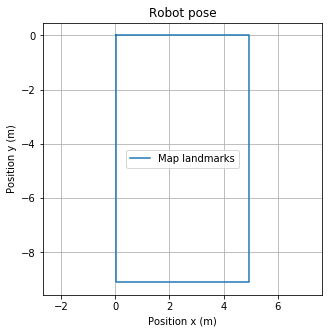

In [2]:
dx = 0.045
markup_x = np.array([0, 4.88, 4.88, 0, 0])
markup_x[:] = markup_x[:] + dx
markup_y = np.array([0, 0, -9.11, -9.11, 0])

plt.figure(figsize=(5,5))
plt.title("Robot pose")
plt.plot(markup_x,markup_y, label= "Map landmarks")
plt.axis('equal')
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.legend()
plt.show()

# Hector SLAM

In [3]:
dataset_path = './../datasets/'
hector_path = dataset_path + 'zed/hector_slam/2018-05-01-00-46-12.bag'
print(hector_path)

./../datasets/zed/hector_slam/2018-05-01-00-46-12.bag


In [4]:
def getInfoAboutBag(bag_path):
    bag = rosbag.Bag(bag_path)
    topics = bag.get_type_and_topic_info()[1].keys()
    types = []
    for i in range(0,len(bag.get_type_and_topic_info()[1].values())):
        types.append(bag.get_type_and_topic_info()[1].values()[i][0])

    print(topics)
    print(types)

In [5]:
getInfoAboutBag(hector_path)

['/slam_out_pose']
['geometry_msgs/PoseStamped']


In [6]:
bag = rosbag.Bag(hector_path)
hectorPoses = []
for topic, msg, t in bag.read_messages(topics=['/slam_out_pose']):
    hectorPoses.append(msg)
bag.close()

In [7]:
print(np.shape(hectorPoses))

(7580,)


In [8]:
def getTime(msg):
    stamp = msg.header.stamp
    (sec,nsec)=(stamp.secs,stamp.nsecs)
    time = 1./1000000000 * nsec + sec
    return time

shift=0
def timeShift(time, shift):
    t = time[:] - shift
    return t

In [9]:
from geometry_msgs.msg import PoseStamped

hector_x = []
hector_y = []
hector_t = []
for poseStamped in hectorPoses:
    hector_x.append(poseStamped.pose.position.x)
    hector_y.append(poseStamped.pose.position.y)
    hector_t.append(getTime(poseStamped))

print(hector_t[0])
hector_x = np.array(hector_x)
hector_y = np.array(hector_y )
hector_t_glob = np.array(hector_t)

hector_t = timeShift(hector_t_glob, hector_t[0])

1523130541.12


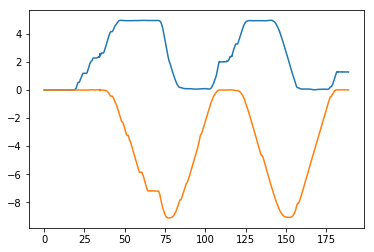

In [10]:
plt.plot(hector_t, hector_x)
plt.plot(hector_t, hector_y);

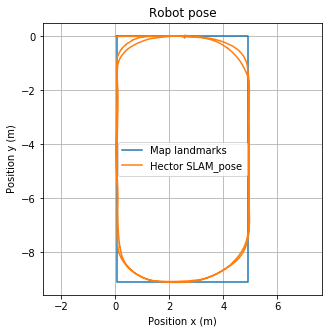

In [11]:
plt.figure(figsize=(5,5))
plt.title("Robot pose")
plt.plot(markup_x,markup_y, label= "Map landmarks")
plt.plot(hector_x, hector_y, label= "Hector SLAM_pose")
plt.axis('equal')
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.legend()
plt.show()

# ZEDfu

In [12]:
import rospkg
rospack = rospkg.RosPack()
zedfu_path= rospack.get_path('carlike') + '/datasets/2018-04-07-22-49-00.bag'
print(zedfu_path)

/home/maksim/mfilipenko_ws/src/carlike/datasets/2018-04-07-22-49-00.bag


In [13]:
getInfoAboutBag(zedfu_path)

['/imu_node/parameter_updates', '/zed/odom', '/hokuyo/parameter_descriptions', '/zed/left/image_raw_color/compressed', '/zed/right/image_raw_color/compressed', '/hokuyo/parameter_updates', '/tf_static', '/imu_node/parameter_descriptions', '/tf', '/joy', '/scan', '/drivecmd', '/diagnostics']
['dynamic_reconfigure/Config', 'nav_msgs/Odometry', 'dynamic_reconfigure/ConfigDescription', 'sensor_msgs/CompressedImage', 'sensor_msgs/CompressedImage', 'dynamic_reconfigure/Config', 'tf2_msgs/TFMessage', 'dynamic_reconfigure/ConfigDescription', 'tf2_msgs/TFMessage', 'sensor_msgs/Joy', 'sensor_msgs/LaserScan', 'ackermann_msgs/AckermannDrive', 'diagnostic_msgs/DiagnosticArray']


In [14]:
bag = rosbag.Bag(zedfu_path)
zedfu_poses = []
for topic, msg, t in bag.read_messages(topics=['/zed/odom']):
    zedfu_poses.append(msg)
bag.close()

In [15]:
print(np.shape(zedfu_poses))

(1257,)


In [16]:
zedfu_x = []
zedfu_y = []
zedfu_t = []

for odom in zedfu_poses:
    zedfu_x.append(odom.pose.pose.position.x)
    zedfu_y.append(odom.pose.pose.position.y)

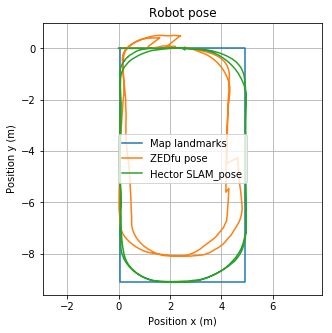

In [17]:
plt.figure(figsize=(5,5))
plt.title("Robot pose")
plt.plot(markup_x,markup_y, label= "Map landmarks")
plt.plot(zedfu_x,zedfu_y, label= "ZEDfu pose")
plt.plot(hector_x, hector_y, label= "Hector SLAM_pose")
plt.axis('equal')
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.legend(loc = 10)
plt.show()

# ORB

In [18]:
orb_path = dataset_path + 'zed/orb/video/FrameTrajectory_TUM_Format.txt'
print(orb_path)

./../datasets/zed/orb/video/FrameTrajectory_TUM_Format.txt


In [19]:
orb = np.loadtxt(orb_path)
np.shape(orb)

(1255, 8)

In [20]:
orb_x = orb[:,3]
orb_y = orb[:,1]
orb_t_glob = orb[:,0]

orb_x = orb_x + 0.355
orb_t = timeShift(orb_t_glob, hector_t_glob[0])
orb_y = orb_y * -1

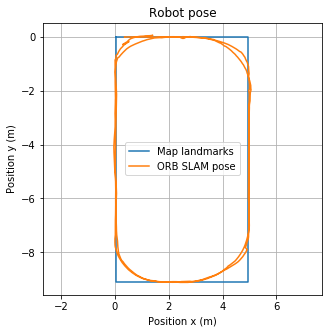

In [21]:
plt.figure(figsize=(5,5))
plt.title("Robot pose")
plt.plot(markup_x,markup_y, label= "Map landmarks")
plt.plot(orb_x,orb_y, label= "ORB SLAM pose")
plt.axis('equal')
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.legend(loc = 10)
plt.show()

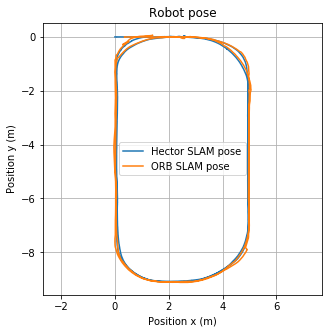

In [22]:
plt.figure(figsize=(5,5))
plt.title("Robot pose")
plt.plot(hector_x, hector_y, label= "Hector SLAM pose")
plt.plot(orb_x,orb_y, label= "ORB SLAM pose")
plt.axis('equal')
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.legend(loc = 10)
plt.show()

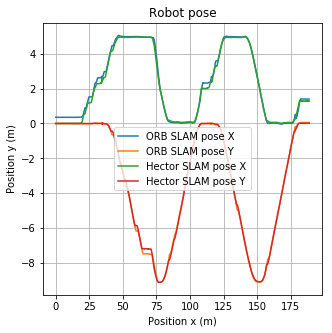

In [31]:
plt.figure(figsize=(5,5))
plt.title("Robot pose")
plt.plot(orb_t, orb_x, label= "ORB SLAM pose X")
plt.plot(orb_t, orb_y, label= "ORB SLAM pose Y")
plt.plot(hector_t, hector_x, label= "Hector SLAM pose X")
plt.plot(hector_t, hector_y, label= "Hector SLAM pose Y");
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.legend(loc = 10)
plt.show()

# LSD

In [24]:
lsd_path = dataset_path + 'lsd/lsd.bag'
print(lsd_path)

./../datasets/lsd/lsd.bag


In [25]:
getInfoAboutBag(lsd_path)

['/lsd_slam/graph', '/LSD_SLAM/parameter_updates', '/lsd_slam/keyframes', '/lsd_slam/pose', '/LSD_SLAM/parameter_descriptions', '/lsd_slam/liveframes', '/LSD_SLAM/Debug/parameter_descriptions', '/LSD_SLAM/Debug/parameter_updates']
['lsd_slam_viewer/keyframeGraphMsg', 'dynamic_reconfigure/Config', 'lsd_slam_viewer/keyframeMsg', 'geometry_msgs/PoseStamped', 'dynamic_reconfigure/ConfigDescription', 'lsd_slam_viewer/keyframeMsg', 'dynamic_reconfigure/ConfigDescription', 'dynamic_reconfigure/Config']


In [26]:
bag = rosbag.Bag(lsd_path)
lsdPoses = []
for topic, msg, t in bag.read_messages(topics=['/lsd_slam/pose']):
    lsdPoses.append(msg)
bag.close()

In [27]:
from geometry_msgs.msg import PoseStamped

lsd_x_glob = []
lsd_y_glob = []
lsd_t_glob = []
for poseStamped in lsdPoses:
    lsd_x_glob.append(poseStamped.pose.position.z)
    lsd_y_glob.append(poseStamped.pose.position.x)
    lsd_t_glob.append(getTime(poseStamped))

lsd_x_glob = np.array(lsd_x_glob)
lsd_y_glob = np.array(lsd_y_glob)
lsd_t_glob = np.array(lsd_t_glob)

lsd_y_glob = lsd_y_glob[:] * -1

lsd_t_ = timeShift(lsd_t_glob, hector_t_glob[0])

In [28]:
n = 700
lsd_x_glob_ = lsd_x_glob[n:]
lsd_y_glob_ = lsd_y_glob[n:]
lsd_t_glob_ = lsd_t_glob[n:]
lsd_t = lsd_t_[n:]

alpha = - 0.40

lsd_x =  np.cos(alpha) * lsd_x_glob_ + np.sin(alpha) * lsd_y_glob_
lsd_y = -np.sin(alpha) * lsd_x_glob_ + np.cos(alpha) * lsd_y_glob_


In [29]:
plot(lsd_t, lsd_x, lsd_t, lsd_y, colors=colors);

NameError: name 'plot' is not defined

In [ ]:
plot(lsd_x, lsd_y, colors=colors);

In [ ]:
plot(lsd_t, lsd_x, lsd_t, lsd_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

In [ ]:
lsd_shift_x = lsd_x[:] - 0.35 
lsd_scale_x = lsd_shift_x[:] * getScale(lsd_shift_x, hector_x)  
lsd_shift_y = lsd_y[:] - 0.445
lsd_scale_y =  lsd_shift_y [:] * getScale(lsd_shift_y , hector_y)

In [ ]:
plot(lsd_t, lsd_scale_x, lsd_t, lsd_scale_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

In [ ]:
plot(lsd_scale_x, lsd_scale_y, hector_x, hector_y,colors=colors);

# DSO

In [ ]:
dso_path = dataset_path + 'dso/result0.6.txt'
print(lsd_path)

In [ ]:
dso = np.loadtxt(dso_path)
np.shape(dso)

In [ ]:
n = 10
dso_x_glob = dso[n:,3]
dso_y_glob = dso[n:,1]
dso_t_glob = dso[n:,0]

dso_t = timeShift(dso_t_glob, hector_t_glob[0])
dso_y_glob = dso_y_glob * -1

alpha = 0.10

dso_x =  np.cos(alpha) * dso_x_glob + np.sin(alpha) * dso_y_glob
dso_y = -np.sin(alpha) * dso_x_glob + np.cos(alpha) * dso_y_glob


In [ ]:
plot(dso_x, dso_y, colors=colors);

In [ ]:
plot(dso_t, dso_x, dso_t, dso_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

In [ ]:
dso_shift_x = dso_x[:] 
dso_scale_x = dso_shift_x[:] * getScale(dso_shift_x, hector_x)
dso_shift_y = dso_y[:] - 0.045
dso_scale_y = dso_shift_y[:] * getScale(dso_shift_y, hector_y)

In [ ]:
plot(dso_t, dso_scale_x, dso_t, dso_scale_y, hector_t, hector_x, hector_t, hector_y, colors=colors);

In [ ]:
plot(dso_scale_x, dso_scale_y, hector_x, hector_y, colors=colors);

# DPPTAM

In [ ]:
dpptam_path = dataset_path + 'dpptam/2018-04-12-21-47-49.bag'
print(dpptam_path)

In [ ]:
getInfoAboutBag(dpptam_path)

In [ ]:
bag = rosbag.Bag(dpptam_path)
dpptam_tf = []
for topic, msg, t in bag.read_messages(topics=['/tf']):
    dpptam_tf.append(msg)
bag.close()

In [ ]:
from tf2_msgs.msg  import TFMessage
import tf2_ros

ddptam_tf = []

for tf in dpptam_tf:
    msg=tf.transforms[0]
    if (msg.child_frame_id == 'dpptam/visualization_marker'):
        ddptam_tf.append(msg.transform)